Identify tissue structure by stCluster
=====

In this section, we will demonstrate how to identify the organizational structure of stCluster clustering results in the spatial domain and compare it with marker genes. We will use the E2S3 slice from the MOSTA E9.5 dataset as an example.

In [1]:
from st_datasets.dataset import get_data, get_mosta_data
from stCluster.run import train_and_evaluate

adata, n_cluster = get_data(get_mosta_data, id=-2)
adata, score = train_and_evaluate(adata, radius=2, n_cluster=n_cluster, cluster_method='mclust', cluster_score_method='ARI', ae_rate=1., adj_rate=10., pred_rate=.4)
print(score)

/home/hanshu/anaconda3/envs/stCluster/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/home/hanshu/anaconda3/envs/stCluster/lib/python3.9/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()
/home/hanshu/anaconda3/envs/stCluster/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


>>> INFO: dataset name: MOSTA dataset, size: (5059, 24238), cluster: 13.(0.851s)
>>> INFO: Input size torch.Size([5059, 3000]).
>>> INFO: Graph contains 53293 edges, average 10.534 edges per node.
>>> INFO: Build graph success!


/home/hanshu/anaconda3/envs/stCluster/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/hanshu/anaconda3/envs/stCluster/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/hanshu/anaconda3/envs/stCluster/lib/python3.9/site-packages/

>>> INFO: Finish generate precluster embedding!
>>> INFO: Finish pre-cluster, result image is saved at "None", begin to prune graph.
>>> INFO: Finish pruning graph, result image is saved at "None".
>>> INFO: Graph contains 142757 edges, average 28.218 edges per node.
>>> INFO: Build graph success!
>>> INFO: Finish model preparations, begin to train model, input data size: (5059, 3000).


>>> INFO: Training: 100%|██████████| 1000/1000 [00:20<00:00, 49.63it/s]
R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 5.4.10
Type 'citation("mclust")' for citing this R package in publications.



>>> INFO: Finish embedding process, total time: 32.139s.
fitting ...
  |======================================================================| 100%
{'mclust': 0.48960712924394234}


We select different hyperparameter for each slices of MOSTA datasets as follows:  
| slice ID | ae_rate | adj_rate | pred_rate |
|----------|---------|----------|-----------|
| E1S1     | 0.6     | 0.7      | 0.6       |
| E2S1     | 0.5     | 0.1      | 0.1       |
| E2S2     | 0.4     | 0.3      | 0.6       |
| E2S3     | 1.0     | 10.0     | 0.4       |
| E2S4     | 0.7     | 0.6      | 0.4       | 

To evaluate the accuracy of our clustering result, we can compare our spatial domain distribution with the distribution of the marker genes.  
Decipher domain related marker genes first:

         Falling back to preprocessing with `sc.pp.pca` and default params.


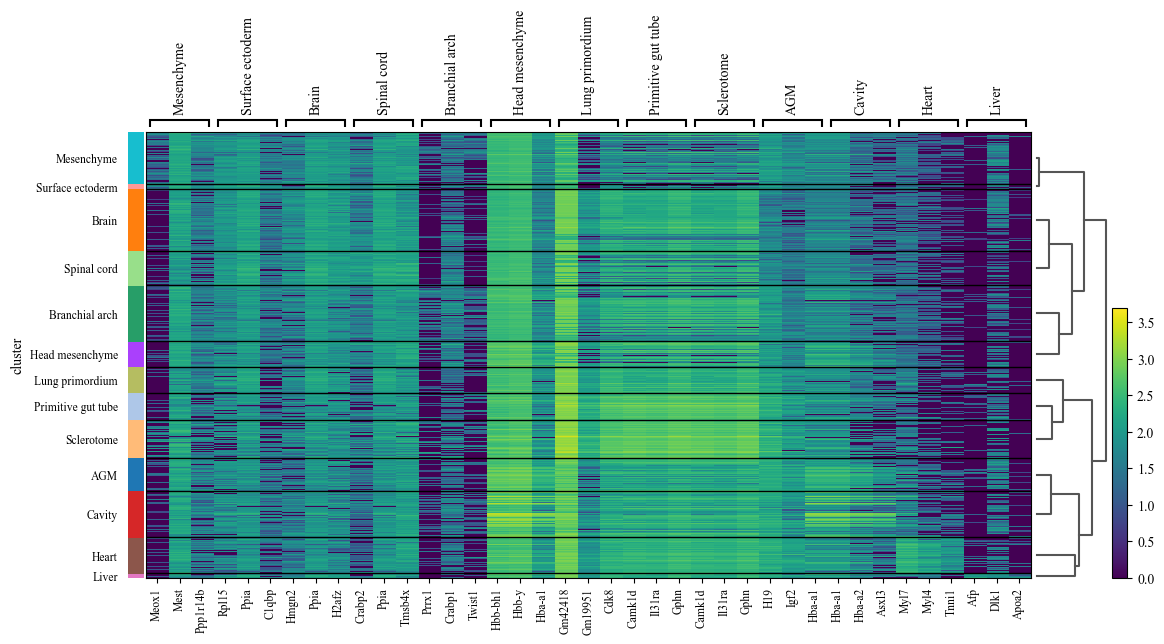

In [2]:
import scanpy as sc

sc.tl.rank_genes_groups(adata, "cluster", method="t-test", use_rep='X')
sc.pl.rank_genes_groups_heatmap(adata,  n_genes=3, groupby="cluster")

We find that gene *Hmgn2*, *Prrx1*, *Myl7*, *Afp*, *Crabp2*, and *Gm42418* can intuitively represent the corresponding domain.  
Compare those gene expressions' distribution with our clustering result.

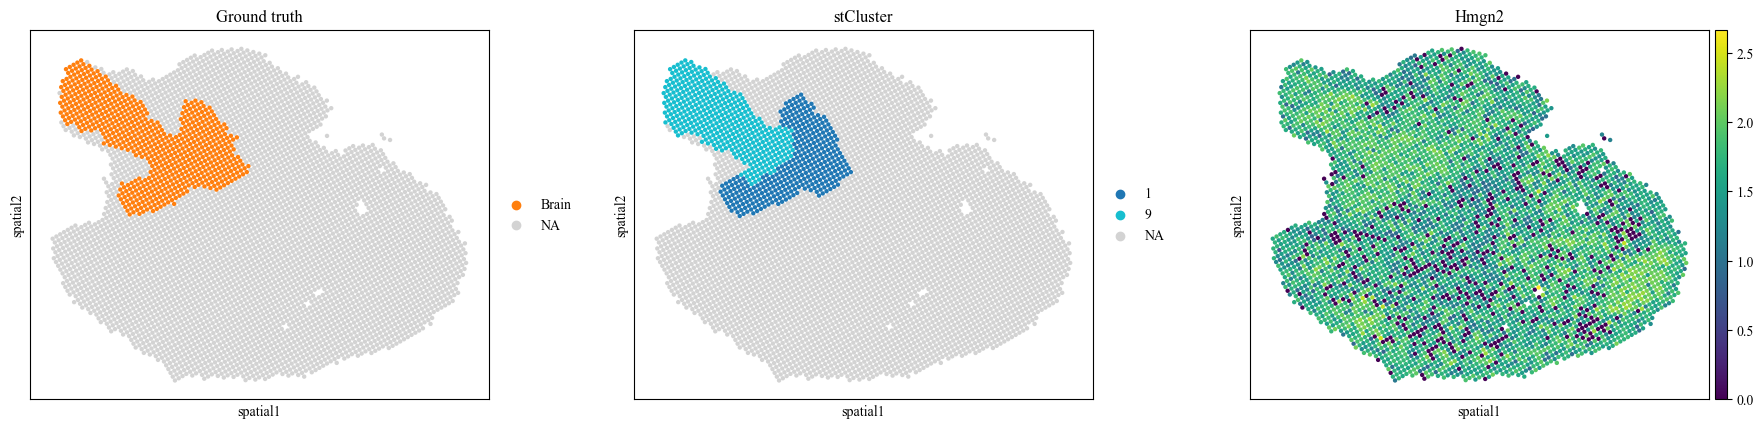

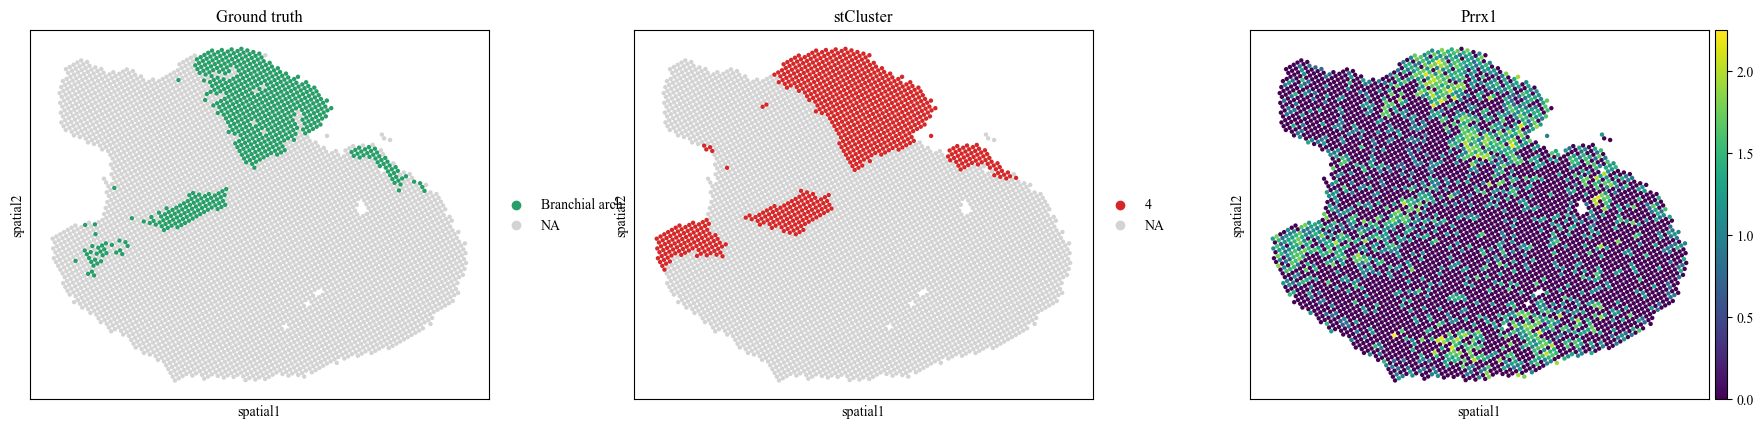

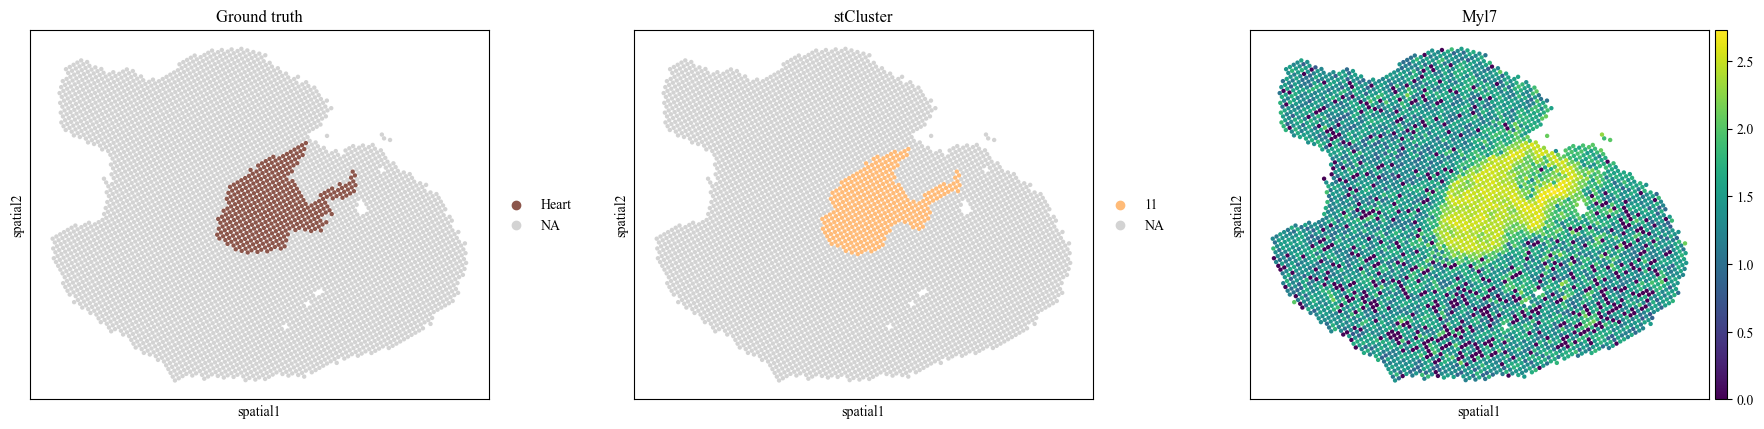

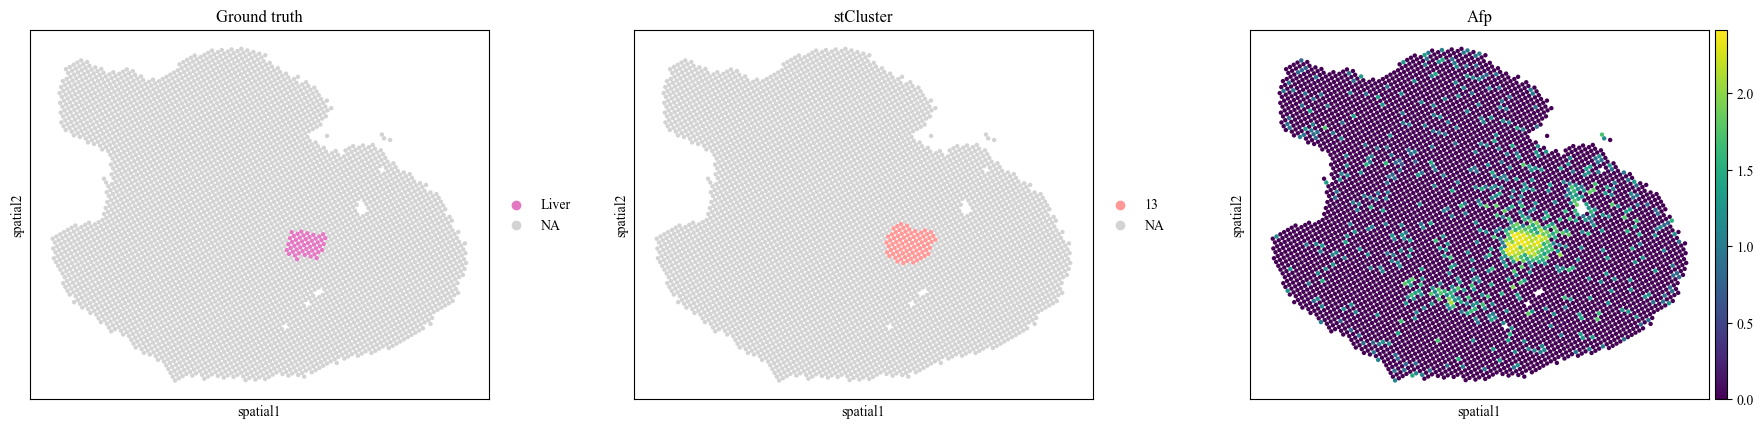

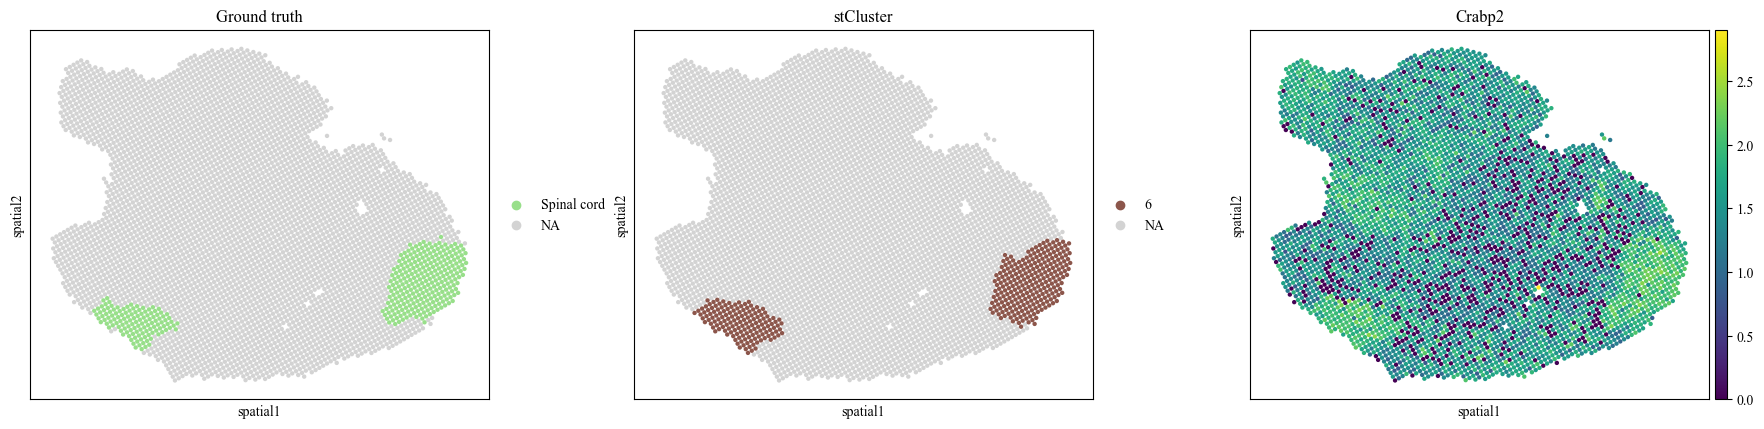

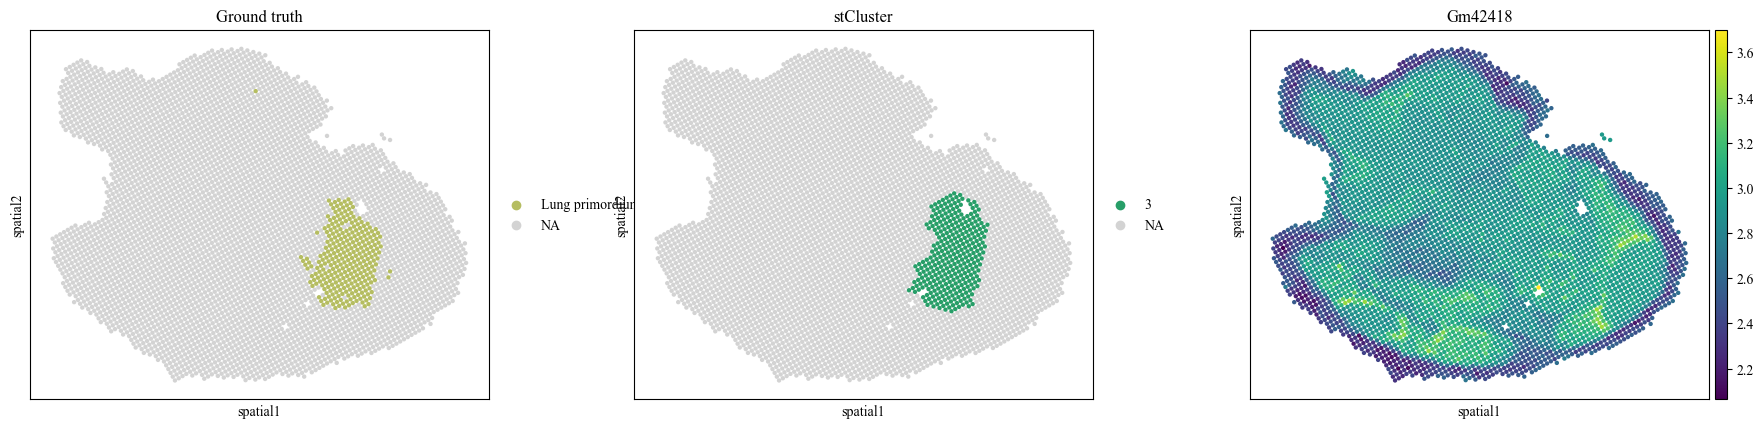

In [3]:
sc.pl.spatial(adata, color=['cluster', 'mclust', 'Hmgn2'], spot_size=1, groups=['Brain', 9, 1], title=['Ground truth', 'stCluster', 'Hmgn2'])
sc.pl.spatial(adata, color=['cluster', 'mclust', 'Prrx1'], spot_size=1, groups=['Branchial arch', 4], title=['Ground truth', 'stCluster', 'Prrx1'])
sc.pl.spatial(adata, color=['cluster', 'mclust', 'Myl7'], spot_size=1, groups=['Heart', 11], title=['Ground truth', 'stCluster', 'Myl7'])
sc.pl.spatial(adata, color=['cluster', 'mclust', 'Afp'], spot_size=1, groups=['Liver', 13], title=['Ground truth', 'stCluster', 'Afp'])
sc.pl.spatial(adata, color=['cluster', 'mclust', 'Crabp2'], spot_size=1, groups=['Spinal cord', 6], title=['Ground truth', 'stCluster', 'Crabp2'])
sc.pl.spatial(adata, color=['cluster', 'mclust', 'Gm42418'], spot_size=1, groups=['Lung primordium', 3], title=['Ground truth', 'stCluster', 'Gm42418'])